In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Introduction to Convolution neural network and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Inspect the data 



In [2]:
import os 
 # Walk through pizza_steak dir 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Get the classnames programmaticaly 

import pathlib 
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
# Let's visualize our images
import random
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder=target_dir+target_class
    
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Read the image and plot
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img
    
    

['3528458.jpg']
Image shape: (512, 512, 3)


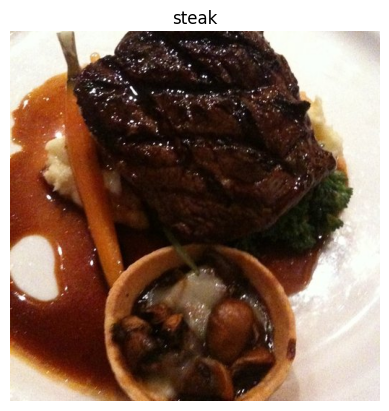

In [5]:
# view the random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[217, 206, 186],
        [213, 202, 182],
        [210, 199, 181],
        ...,
        [227, 222, 216],
        [226, 221, 217],
        [239, 234, 230]],

       [[219, 208, 188],
        [213, 202, 182],
        [207, 196, 178],
        ...,
        [223, 218, 212],
        [221, 216, 212],
        [226, 221, 217]],

       [[211, 203, 184],
        [225, 217, 198],
        [235, 226, 209],
        ...,
        [217, 212, 206],
        [222, 217, 213],
        [228, 223, 219]],

       ...,

       [[240, 233, 223],
        [239, 232, 222],
        [238, 231, 221],
        ...,
        [240, 230, 228],
        [233, 223, 221],
        [238, 228, 226]],

       [[237, 231, 219],
        [235, 229, 217],
        [234, 228, 216],
        ...,
        [239, 229, 227],
        [236, 226, 224],
        [239, 229, 227]],

       [[236, 230, 218],
        [233, 227, 215],
        [232, 226, 214],
        ...,
        [239, 229, 22

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, mpore specifically we need a way to:

* load our images
* preprocess our images 
* build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

### 1. preprocess images

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data (Normalization => Get all pixels values between 1 & 0)
train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.3,
                                  horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir="/tensorflow_coursse/pizza_steak/train/"
test_dir="/tensorflow_coursse/pizza_steak/test/"



# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 2. Build + Compile + Fit (Model)

In [8]:
# Build a CNN model (same as tine VGG)
model_over= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,# Filters is the number of sliding windows going across an input (higher = more complex model)
                           kernel_size=3,# kernel size is the size of sliding window going across input 
                           strides=1,# the size of the step the sliding window takes across the input 
                           padding="valid",# if "same", output shape is same as input shape, if "valid" output gets compressed
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.MaxPool2D(pool_size=2,
    #                           padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model_over.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_over = model_over.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 46s 768ms/step - loss: 1.0167 - accuracy: 0.5427 - val_loss: 0.5849 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.5584 - accuracy: 0.7307 - val_loss: 0.4726 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4906 - accuracy: 0.7807 - val_loss: 0.4396 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 8s 159ms/step - loss: 0.3801 - accuracy: 0.8387 - val_loss: 0.4111 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.2704 - accuracy: 0.9067 - val_loss: 0.4260 - val_accuracy: 0.8160


### Evaluating our model

<AxesSubplot: >

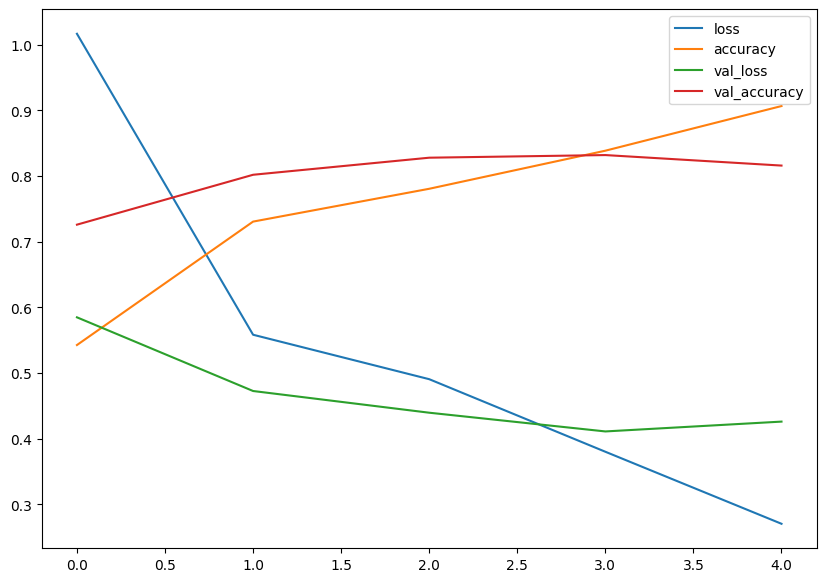

In [9]:
# plot training
pd.DataFrame(history_over.history).plot(figsize=(10,7))

In [10]:
# plot validation and training curves seperately 

def plot_loss_curves(history):
    loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    
    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]
    
    epochs= range(len(history.history["loss"]))
    
    # Plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    
     # Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

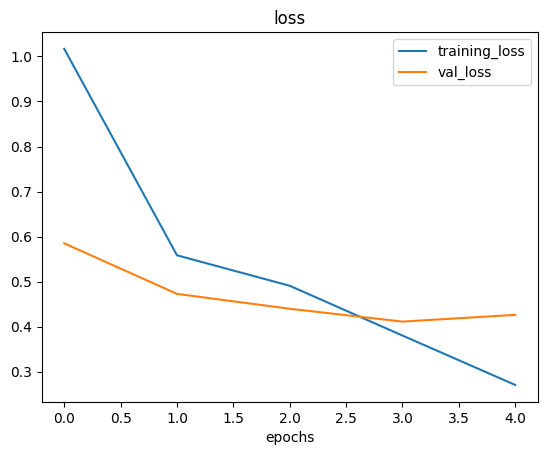

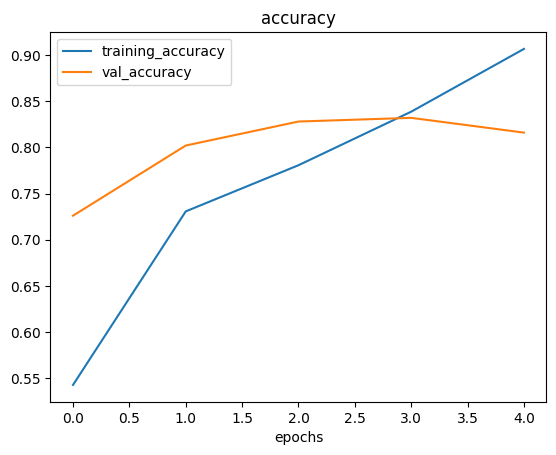

In [11]:
plot_loss_curves(history=history_over)

### Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* add another dense layer to the output of our flattened layer

### Reduce overfitting:

* Add data augmentation
* Add regulariization layers (MaxPool2D)
* Add more data

In [34]:
# Build a CNN model (same as tine VGG)
model_regular= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model_regular.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_regular = model_regular.fit(train_data,
                    epochs=7,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/7
47/47 [==============================] - 28s 585ms/step - loss: 0.6522 - accuracy: 0.6233 - val_loss: 0.5171 - val_accuracy: 0.7720
Epoch 2/7
47/47 [==============================] - 26s 541ms/step - loss: 0.5543 - accuracy: 0.7260 - val_loss: 0.4770 - val_accuracy: 0.7480
Epoch 3/7
47/47 [==============================] - 26s 547ms/step - loss: 0.5536 - accuracy: 0.7300 - val_loss: 0.3917 - val_accuracy: 0.8200
Epoch 4/7
47/47 [==============================] - 28s 584ms/step - loss: 0.5150 - accuracy: 0.7433 - val_loss: 0.4058 - val_accuracy: 0.8180
Epoch 5/7
47/47 [==============================] - 26s 557ms/step - loss: 0.5069 - accuracy: 0.7480 - val_loss: 0.3749 - val_accuracy: 0.8300
Epoch 6/7
47/47 [==============================] - 27s 562ms/step - loss: 0.4934 - accuracy: 0.7733 - val_loss: 0.3410 - val_accuracy: 0.8500
Epoch 7/7
47/47 [==============================] - 25s 538ms/step - loss: 0.4732 - accuracy: 0.7793 - val_loss: 0.4030 - val_accuracy: 0.8240


In [29]:
model_regular.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 10)      

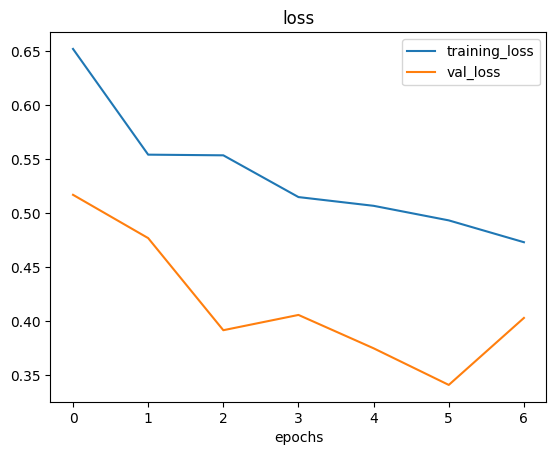

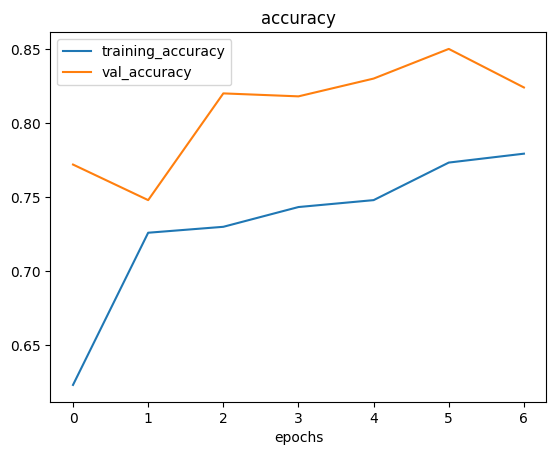

In [35]:
plot_loss_curves(history=history_regular)

## try on non CNN model

In [12]:
tf.random.set_seed(42)

# Create a model 

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
    
])



# Compile our model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_1 = model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 3.3555 - accuracy: 0.6613 - val_loss: 0.8053 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 8s 165ms/step - loss: 1.0485 - accuracy: 0.7240 - val_loss: 1.1237 - val_accuracy: 0.5820
Epoch 3/5
47/47 [==============================] - 7s 154ms/step - loss: 1.2706 - accuracy: 0.7133 - val_loss: 0.6681 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.7862 - accuracy: 0.7680 - val_loss: 0.7062 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 8s 159ms/step - loss: 1.3757 - accuracy: 0.7280 - val_loss: 1.0232 - val_accuracy: 0.7480


In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               19267712  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,278,081
Trainable params: 19,278,081
Non-trainable params: 0
_________________________________________________________________


## Become one with the data

['2625330.jpg']
Image shape: (512, 512, 3)
['271675.jpg']
Image shape: (384, 512, 3)


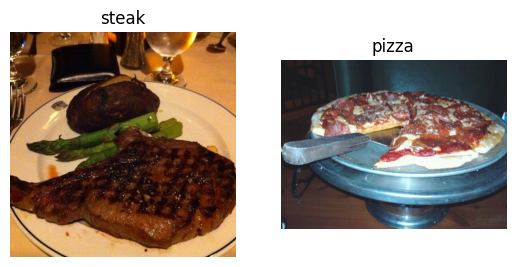

In [14]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")